**E-HEALTH - LABORATORY 2**

**DOWNLOAD THE DATASET**

In this laboratory, we use the data that are available at link https://drive.google.com/file/d/1aKxhopFE8rAs_mRTaKmnYGDqqS_t4Evg/view?usp=sharing

We download the folder and add the data to the COLAB Notebook.

In [1]:
%pip install googledrivedownloader
from googledrivedownloader import download_file_from_google_drive
import zipfile

download_file_from_google_drive(file_id='1aKxhopFE8rAs_mRTaKmnYGDqqS_t4Evg',
                                dest_path='./ehealth_lab_2.zip',
                                unzip=False,
                                overwrite=True)

with zipfile.ZipFile("./ehealth_lab_2.zip","r") as zip_ref:
    zip_ref.extractall("./ehealth_lab_2")

path_to_dataset_folder = "./ehealth_lab_2/"

We install and import `mne` and other useful Python packages.

In [2]:
%pip install mne
import mne
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 39.6 MB/s eta 0:00:00


We define a method for plotting data as a time series.

In [3]:
def plot_series(times: np.ndarray,
                series: np.ndarray,
                xlabel: str,
                ylabel: str,
                xlim: list = None,
                ylim: list = None,
                title: str = None,
                plot_num: int = None):

  # The variable plot_num determines the number of time points that we want to analyze
  # If plot_num is lower than the data number we represent both the median and the interquartile range of the data in time

  fig = plt.figure()

  if plot_num is not None:

    plot_num = np.min((plot_num, len(series)))

    plot_sample_size = int(len(series) / plot_num)

    data = np.reshape(series[:plot_sample_size * plot_num], (plot_sample_size, plot_num))
    times = np.reshape(times[:plot_sample_size * plot_num], (plot_sample_size, plot_num))

    data_medians = np.median(data, axis=1)

    times = np.median(times, axis=1)
    data_75percent = np.percentile(data, 75, axis=1)
    data_25percent = np.percentile(data, 25, axis=1)

  else:

    data_medians = series

  if plot_num is not None:

    plt.plot(times, data_75percent, linestyle='-', color='orangered', label='25-75 percentile')
    plt.plot(times, data_25percent, linestyle='-', color='orangered')
    plt.fill_between(times, y1=data_25percent, y2=data_75percent, color='lightsalmon')
    plt.plot(times, data_medians, linestyle='-', marker='d', color='orangered', label='Median')

    plt.legend()

  else:

    plt.plot(times, data_medians, linestyle='-', color='orangered')

  plt.grid('on')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

  if xlim is not None:
    plt.xlim(xlim)
  else:
    plt.xlim((times[0], times[-1]))

  if ylim is not None:
    plt.xlim(ylim)

  if title is not None:
    plt.title(title)

  fig.tight_layout()

We define a method to plot groups of data as boxplot distibutions.

In [4]:
def plot_boxplots(data_distributions: list,
                  data_labels: np.ndarray,
                  ylabel: str,
                  xlabel: str,
                  title: str = None):

  fig = plt.figure()
  plt.boxplot(data_distributions, tick_labels=data_labels)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.grid()

  if title is not None:
    plt.title(title)

  fig.tight_layout()

Today, we work with a dataset of ECG signals from PhysioNet, a free-available repository of medical data, managed by MIT.

The full dataset can be found at https://physionet.org/content/simultaneous-measurements/1.0.2/.

We consider a subset of the original dataset. The data are contained into the folder "path_to_dataset_folder".

In [5]:
os.listdir(path_to_dataset_folder)

['x005_FAROS_qrs_peak_times.npz',
 'x002_FAROS_qrs_peak_times.npz',
 'x005_FAROS.edf',
 'x001_FAROS_qrs_peak_times.npz',
 'x002_FAROS_qrs_peak_samples.npz',
 'x004_FAROS.edf',
 'x004_FAROS_qrs_peak_times.npz',
 'x002_FAROS.edf',
 'x001_FAROS_qrs_peak_samples.npz',
 'x003_FAROS_qrs_peak_times.npz',
 'x005_FAROS_qrs_peak_samples.npz',
 'x003_FAROS_qrs_peak_samples.npz',
 'x003_FAROS.edf',
 'x001_FAROS.edf',
 'x004_FAROS_qrs_peak_samples.npz']

The EDF files contain the original ECG data, while the numpy files contain the QRS peaks associated with each ECG.

We load one of the ECG and analyze its basic information.

In [6]:
file_name = 'x001_FAROS.edf'
raw_data = mne.io.read_raw_edf(path_to_dataset_folder + file_name)
raw_data.info

Extracting EDF parameters from /content/ehealth_lab_2/x001_FAROS.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<Info | 8 non-empty values
 bads: []
 ch_names: ECG, Accelerometer_X, Accelerometer_Y, Accelerometer_Z, Marker, ...
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: 2001-01-01 00:00:00 UTC
 nchan: 7
 projs: []
 sfreq: 1000.0 Hz
 subject_info: <subject_info | his_id: FAROS>
>

In [7]:
raw_data.info['ch_names']

['ECG',
 'Accelerometer_X',
 'Accelerometer_Y',
 'Accelerometer_Z',
 'Marker',
 'HRV',
 'DEV_Temperature']

The ECG signal corresponds to the first channel of the file.

We load a portion of the ECG signal of 2**14 samples.

In [8]:
sample_size = 2 ** 14 # Set a power of two as max sample number
ecg_signal = raw_data.get_data()[0][:sample_size] * 1000  # The ECG is saved in the first channel
ecg_signal_times = raw_data.times[:sample_size]  # The domain of the ECG signal

We plot the ECG signal.

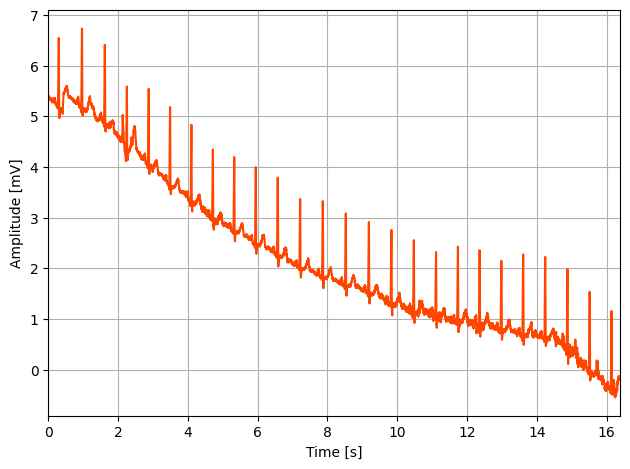

In [9]:
plot_series(ecg_signal_times,
            ecg_signal,
            'Time [s]',
            'Amplitude [mV]')

plt.show()

We can appreciate that the heart rate is approximately 90 bpm.

We load the QRS time series, reporting the time instances associated with each QRS peak.

In particular, we have two series, the first reports the samples (discrete domain), while the second reports the time instances associated with each sample (continuos domain).

In [10]:
qrs_peak_samples = np.load(path_to_dataset_folder + file_name[:-4] + '_qrs_peak_samples.npz')['data'] # Discrete sample
qrs_peak_times = np.load(path_to_dataset_folder + file_name[:-4] + '_qrs_peak_times.npz')['data'] # Continuos time [s]

In order to compute the Heart Rate Variability (HRV), the first task is to compute the R-to-R (RR) intervals, i.e., the distances between consecutive QRS peaks during the monitored period.

In this case, we associate each NN interval with a time reference, which is the first QRS peak of the target interval: in other words, if an RR interval is measured from the QRS peak at time 10.0 s and the QRS peak at time 11.0 s, we assume that such a measure was recorded at time 10.0 s.

In [11]:
rr_intervals = qrs_peak_times[1:] - qrs_peak_times[:-1] # Series of RR intervals
rr_interval_times = qrs_peak_times[:-1]  # Time references of the RR interval series

We remove all the measures higher than 1.5 seconds, which are likely associated with erroneous measures. Notably, RR intervals higher than 1.5 seconds imply a Heart Rate (HR) lower than 40 bpm (bradycardia).

In [12]:
rr_interval_times = np.asarray([rr_interval_times[x] for x in range(len(rr_interval_times)) if rr_intervals[x] < 1.5])
rr_intervals = np.asarray([rr_intervals[x] for x in range(len(rr_intervals)) if rr_intervals[x] < 1.5])

We compute the Heart Rate (HR) series as the inverse of the RR interval series. We multiply the result by 60 to measure the HR in beats per minute.

In [13]:
heart_rates = 1 / rr_intervals * 60 # Measured in beat-per-minute [bpm]
heart_rate_times = np.copy(rr_interval_times)  # Time references of the HR series

Another important data series is given by the differences between subsequent RR intervals, which we denote by SD. Again, we associate each SD measure with a time reference.

In [14]:
subsequent_differences =  np.abs(rr_intervals[1:] - rr_intervals[:-1]) # series of subsequent RR differences
# This provides insight into short-term fluctuations in heart rate.

subsequent_difference_times = rr_interval_times[:-1]  # Time references of the subsequent RR differencesnp.abs(rr_intervals[1:] - rr_intervals[:-1]) # Series of subsequent

We analyze the Heart Rate (HR), the RR interval series, and the SD series in time.

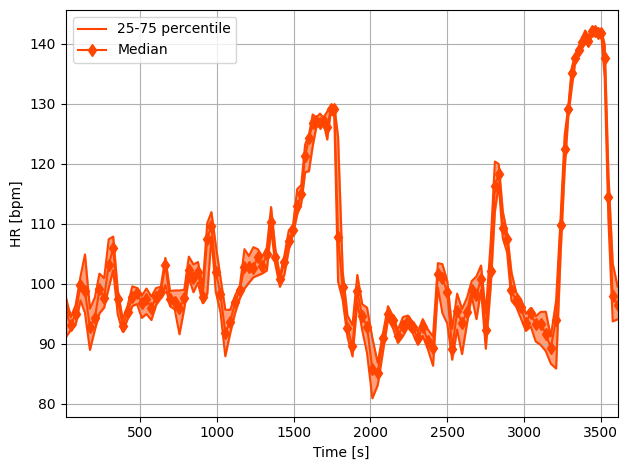

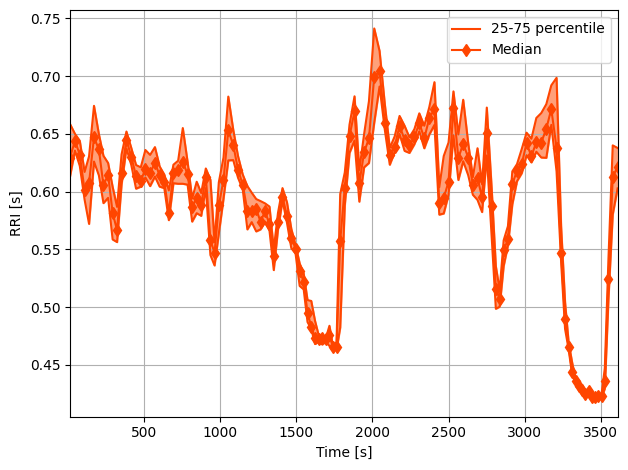

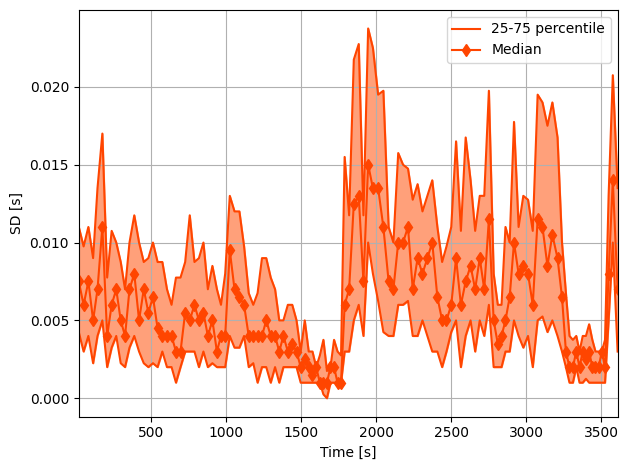

In [15]:
plot_series(heart_rate_times, heart_rates, 'Time [s]', 'HR [bpm]', plot_num=50)
plot_series(rr_interval_times, rr_intervals, 'Time [s]', 'RRI [s]', plot_num=50)
plot_series(subsequent_difference_times, subsequent_differences, 'Time [s]', 'SD [s]', plot_num=50)

Two naive estimations of the HRV are the standard deviation of the NN intervals and the mean of the subsequent NN interval differences. A more accurate HRV estimate is the Root Mean Squared (RMS) of the subsequent NN interval differences.

All these metrics need to be computed over a certain time period: indeed, we need multiple measures to compute a standard deviation. Practically, before estimating the HRV, we need to segment the signal in windows, and then estimate the HRV for each of the windows.

Notably, the windows can be overlapped in order to increase the number of HRV measures. At the same time, a minimum duration of 4 minutes is reccomended in order to have reliable HRV estimates.

We define a method to segment the ECG signal into overlapped windows and compute the HRV metrics that we have previously listed.

In [16]:
def get_naive_hrv_estimates(rr_intervals: np.ndarray,
                            subsequent_differences: np.ndarray,
                            subsequent_difference_times: np.ndarray,
                            window_duration: float,
                            window_shift: float):

  time_limit = subsequent_difference_times[-1] # This is the last time measure that we have

  window_times = []
  std_rr_intervals = []
  avg_subsequent_differences = []
  rms_subsequent_differences = []

  window_start_time = 0  # Starting time of the window
  window_end_time = window_start_time + window_duration  # Ending time of the window

  while window_end_time < time_limit:

    start_time_index = np.argmin(np.abs(window_start_time-subsequent_difference_times))  # Index of the RR interval associated with the starting time
    end_time_index = np.argmin(np.abs(window_end_time-subsequent_difference_times))  # Index of the RR interval associated with the ending time

    # We select the portion of the series associated with the window range

    window_rr_intervals = rr_intervals[start_time_index:end_time_index]
    window_subsequent_differences = subsequent_differences[start_time_index:end_time_index]

    # We save both the HRV estimates and the starting time of the window as a time reference of the measure

    window_times.append(window_start_time)

    std_rr_intervals.append(np.std(window_rr_intervals))
    avg_subsequent_differences.append(np.mean(window_subsequent_differences))
    rms_subsequent_differences.append(np.sqrt(np.mean(np.power(window_subsequent_differences,2))))

    # We update the starting and ending times of the window

    window_start_time += window_shift
    window_end_time = window_start_time + window_duration

  return window_times, std_rr_intervals, avg_subsequent_differences, rms_subsequent_differences

In [17]:
window_duration = 60 * 4 # We set the window duration to 240 seconds
window_shift = 60 # We consider 1 minute of overlapping time between consecutive windows

window_times, std_rr_intervals, avg_subsequent_differences, rms_subsequent_differences = get_naive_hrv_estimates(rr_intervals, subsequent_differences, subsequent_difference_times, window_duration, window_shift)

We plot the results in time.

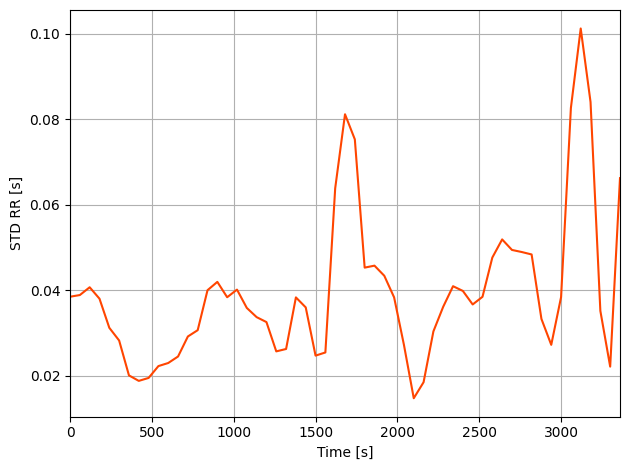

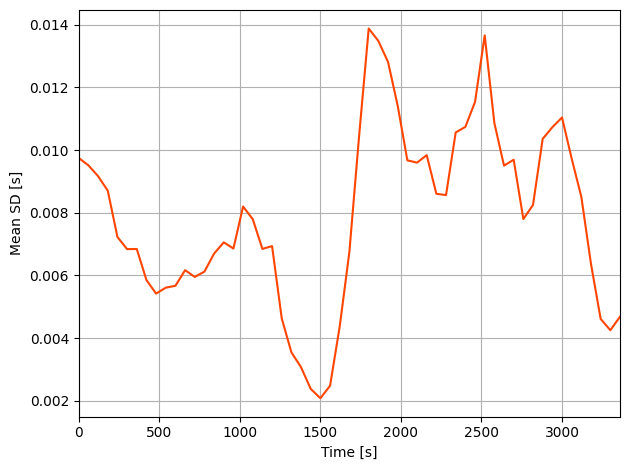

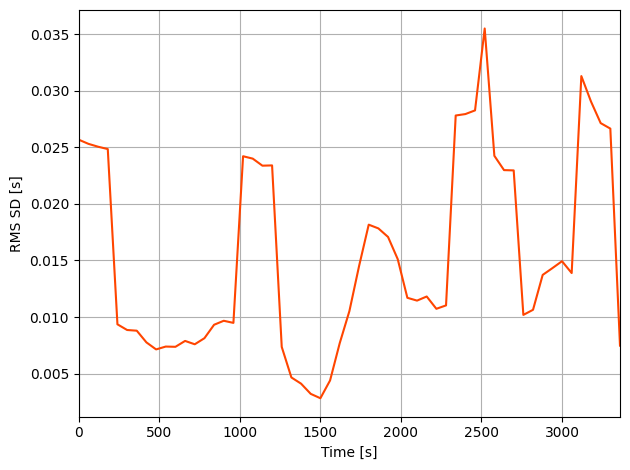

In [18]:
plot_series(window_times, std_rr_intervals, 'Time [s]', 'STD RR [s]')
plot_series(window_times, avg_subsequent_differences, 'Time [s]', 'Mean SD [s]')
plot_series(window_times, rms_subsequent_differences, 'Time [s]', 'RMS SD [s]')

**YOUR TURN**

We have already computed three naive HRV estimates, i.e., the standard deviation of the RR series, and the mean and the root mean squared of the SD series.

In the following, you are asked to compute four additional HRV measures.

*   the probability (ppRRtau) that consecutive RR intervals differ more than tau=20 ms;
*   the energy associated with the low-frequency band ([0.06, 0.10] Hz) of the RR series;
*   the energy associated with the high-frequency band ([0.15, 0.40] Hz) of the RR series;
*   the energy ratio between the low and high frequency bands.

To compute the ppRRtau values, you can follow the same approach we used before, i.e., divide the RR series into windows and compute a different HRV estimate for each window.

To this goal, you can just modify the following method.

In [19]:
def get_pprrtau_values(rr_intervals: np.ndarray,
                       rr_interval_times: np.ndarray,
                       window_duration: float,
                       window_shift: float,
                       tau: float):

  time_limit = rr_interval_times[-1] # This is the last time measure that we have

  window_times = []
  pprrtau_values = []

  window_start_time = 0  # Starting time of the window
  window_end_time = window_start_time + window_duration  # Ending time of the window

  while window_end_time < time_limit:

    start_time_index = np.argmin(np.abs(window_start_time-rr_interval_times))  # Index of the RR interval associated with the starting time
    end_time_index = np.argmin(np.abs(window_end_time-rr_interval_times))  # Index of the RR interval associated with the ending time

    # We select the portion of the series associated with the window range

    window_rr_intervals = rr_intervals[start_time_index:end_time_index]

    pprrtau = np.sum(np.abs(window_rr_intervals[1:] - window_rr_intervals[:-1]) > tau) / len(window_rr_intervals)    # Compute the ppRRtau metric for estimating the HRV

    window_times.append(window_start_time)  # Append the new time reference

    pprrtau_values.append(pprrtau) # Append the HRV estimate

    # We update the starting and ending times of the window

    window_start_time += window_shift
    window_end_time = window_start_time + window_duration

  return window_times, pprrtau_values

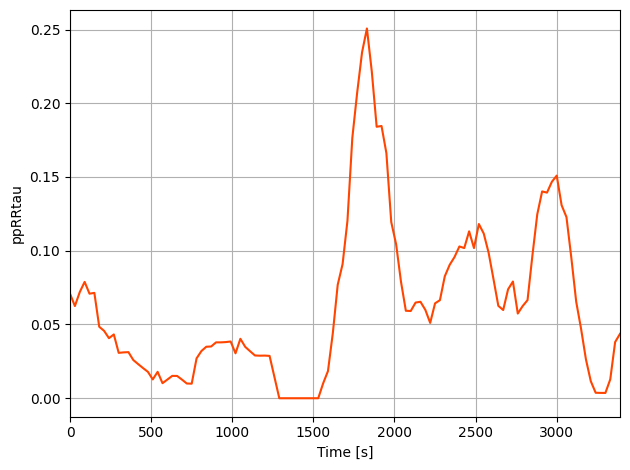

In [20]:
window_duration = 240 # Choose the window duration
window_shift = 30 # Choose the window shift
tau = 0.020 # Choose tau

window_times, pprrtau_values =\
  get_pprrtau_values(rr_intervals, rr_interval_times, window_duration, window_shift, tau)

plot_series(window_times, pprrtau_values, 'Time [s]', 'ppRRtau')

To estimate the HRV from the spectrum of the RR series, you need first to interpolate the RR series. This is necessary to get a uniform sampling in the time domain.

In [21]:
new_rr_interval_times = np.linspace(rr_interval_times[0], rr_interval_times[-1],
                                    num=int(2*(rr_interval_times[-1]-rr_interval_times[0])))  # New time references
interp_function = scipy.interpolate.interp1d(rr_interval_times, rr_intervals)  # Function to interpolate the series
new_rr_intervals = interp_function(new_rr_interval_times) # New RR intervals

Given the new time distribution of the RR interval series, we compute the sampling period and the sampling frequency.

In [22]:
sampling_period = new_rr_interval_times[1] - new_rr_interval_times[0]  # Sampling period
sampling_frequency = 1 / sampling_period  # Sampling frequency

We have all the necessary information to compute the Fourier Transform of the series. Also in this case, we can exploit the window segmentation in order to have multiple HRV estimates, each associated with a portion of the original ECG signal.

Hence, to compute the low-frequency and high-frequency energy of the signal, you can just modify the following method.

In [23]:
def get_rr_energy_density(interpolated_rr_intervals: np.ndarray,
                          interpolated_rr_interval_times: np.ndarray,
                          window_duration: float,
                          window_shift: float,
                          sampling_period: float,
                          energy_band: list):

  sample_limit = len(interpolated_rr_interval_times) # The index of the last sample of the series

  window_times = []
  energy_values = []

  sample_window_duration = int(window_duration / sampling_period)  # Window duration in sample
  sample_window_shift = int(window_shift / sampling_period)  # Window shift in sample

  window_start_sample = 0  # Starting sample of the window
  window_end_sample = sample_window_duration  # Ending sample of the window

  while window_end_sample < sample_limit:

    # We select the portion of the series associated with the window range

    window_rr_intervals = interpolated_rr_intervals[window_start_sample:window_end_sample]

    fft_window_rr_intervals = np.fft.fft(window_rr_intervals) # Compute the Fourier Transform of the signal

    energy = np.sum(np.abs(np.fft.fft(window_rr_intervals)[(np.fft.fftfreq(len(window_rr_intervals), d=sampling_period) >= energy_band[0]) & (np.fft.fftfreq(len(window_rr_intervals), d=sampling_period) <= energy_band[1])]) ** 2)


    window_times.append(window_start_sample * sampling_period)  # Append the new time reference

    energy_values.append(energy) # Append the new energy value

    # We update the starting and ending samples of the window

    window_start_sample += sample_window_shift
    window_end_sample = window_start_sample + sample_window_duration

  return window_times, energy_values

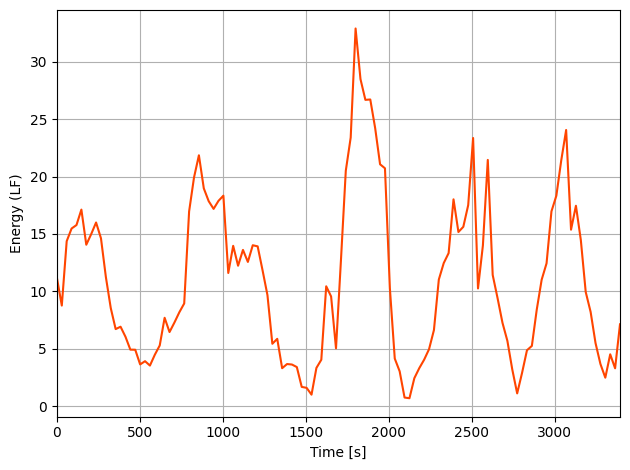

In [24]:
low_energy_band = [0.06, 0.10] # Insert the frequencies associated with the low-frequency band

window_times, low_energy_values =\
  get_rr_energy_density(new_rr_intervals,
                        new_rr_interval_times,
                        window_duration,
                        window_shift,
                        sampling_period,
                        low_energy_band)

plot_series(window_times, low_energy_values, 'Time [s]', 'Energy (LF)')

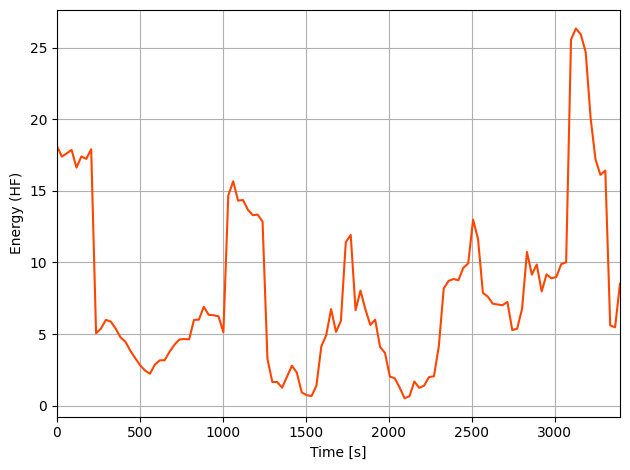

In [25]:
high_energy_band = [0.15, 0.40] # Insert the frequencies associated with the high-frequency band

window_times, high_energy_values =\
  get_rr_energy_density(new_rr_intervals,
                        new_rr_interval_times,
                        window_duration,
                        window_shift,
                        sampling_period,
                        high_energy_band)

plot_series(window_times, high_energy_values, 'Time [s]', 'Energy (HF)')

Given the energies of the low and high-frequency bands, computing the ratio is straightforward.

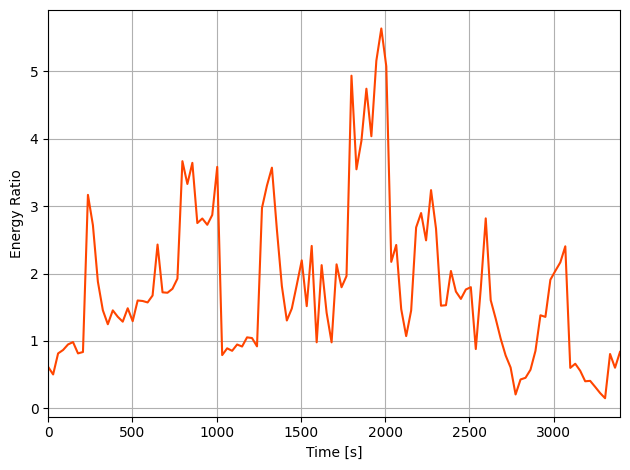

In [26]:
energy_ratios = np.array(low_energy_values) / np.array(high_energy_values)  # Compute the energy ratio

plot_series(window_times, energy_ratios, 'Time [s]', 'Energy Ratio')

**HOW TO COMPLETE THE LAB**

To complete the laboratory, you must repeat the above analysis for all the signals in the folder.

The results of the laboratory, including the figures representing the Heart Rate Variability (HRV) (in terms of ppRRtau and energy ratio) of each signal, must included in a report of a maximum of three pages.

In the laboratory report, you must discuss which signal presents the higher and lower Heart Rate Variability (HRV) and why.

In [27]:
# Compute the mean ppRRtau
mean_ppRRtau = np.mean(pprrtau_values)

# Display the result
print(f"Mean ppRRtau for the signal: {mean_ppRRtau}")

Mean ppRRtau for the signal: 0.06309710402091807


In [28]:
# Compute the average energy ratio
average_energy_ratio = np.mean(energy_ratios)

# Display the result
print(f"Average energy ratio for the signal: {average_energy_ratio}")

Average energy ratio for the signal: 1.8170931471600227
